In [4]:
import mne
import numpy as np
import matplotlib.pyplot as plt

# Import the FOOOF object
from fooof import FOOOF
from fooof import FOOOFGroup

# Import a utility to download and load example data
from fooof.utils.download import load_fooof_data

import mne
import numpy as np
import os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from spiketools.plts.utils import make_axes

import imagesc as imagesc

import warnings
warnings.filterwarnings("ignore")

In [15]:
# folder of the results
path_files = Path('/home/b1044271/Columbia/Results/FOOOF_interp/Cz')

# Get names of all subject folder
sbj_folders = list(path_files.iterdir())
sbj_folders = sorted(sbj_folders)

pathX = path_files / 'VP01'/'N1'/'Knee'
filesF1 = list(pathX.iterdir())

In [42]:
# Get the fooof results for each subject
Stages    = ['N1','N2','N3','AW','RM']
nfm       = FOOOF()
nfm2      = FOOOF()
knee_arr  = pd.DataFrame(np.nan,index=range(len(Stages)),columns=range(len(filesF1)))
Nknee_arr = pd.DataFrame(np.nan,index=range(len(Stages)),columns=range(len(filesF1)))

iii = 0
for stage in Stages:
    i = 0
    S_arr = pd.DataFrame(np.nan,index=range(len(sbj_folders)),columns=range(len(filesF1)))
    NS_arr = pd.DataFrame(np.nan,index=range(len(sbj_folders)),columns=range(len(filesF1)))
    for subj in sbj_folders:
        path1 = subj / stage / 'Knee'
        filesF = list(path1.iterdir())
        path2 = subj / stage / 'NoKnee'
        filesF2 = list(path2.iterdir())
        
        ii=0
        for F in filesF:
            nfm.load(os.path.basename(F) , str(path1))
            S_arr.iloc[[i],[ii]] = nfm.r_squared_
            ii = ii+1
            
        ii=0    
        for F2 in filesF2:
            nfm2.load(os.path.basename(F2) , str(path2))
            NS_arr.iloc[[i],[ii]] = nfm2.r_squared_
            ii = ii+1
        i = i+1
        
    knee_arr.iloc[[iii],0:20] = list(S_arr.mean(axis=0))
    Nknee_arr.iloc[[iii],0:20] = list(NS_arr.mean(axis=0))
    iii = iii +1                                        

In [43]:
Subj

NameError: name 'Subj' is not defined

In [44]:
# The knee_arr / Nknee_arr dataframes contain th r2 averaged over all subjects per stage
# now we can mean over stages or use each stage separately (up to you) 
# here i'm gonna mean over all stages for an overall sensitivity matrix
K_R2_all = list(knee_arr.mean(axis=0))
NK_R2_all = list(Nknee_arr.mean(axis=0))

Knee_av_final = np.reshape(K_R2_all, (5, 4)).T
NKnee_av_final = np.reshape(NK_R2_all, (5, 4)).T

In [45]:
X = [np.mean(Knee_av_final), np.mean(NKnee_av_final)]
X

[0.9883155163858385, 0.9872803266260721]

In [46]:
Knee_av_final

array([[0.99062308, 0.99112935, 0.98620655, 0.98946245, 0.98402947],
       [0.99343137, 0.99333247, 0.99137607, 0.99047159, 0.98008104],
       [0.99379666, 0.99206715, 0.99114374, 0.98712222, 0.976013  ],
       [0.99321924, 0.99236705, 0.98966704, 0.98642957, 0.97434122]])

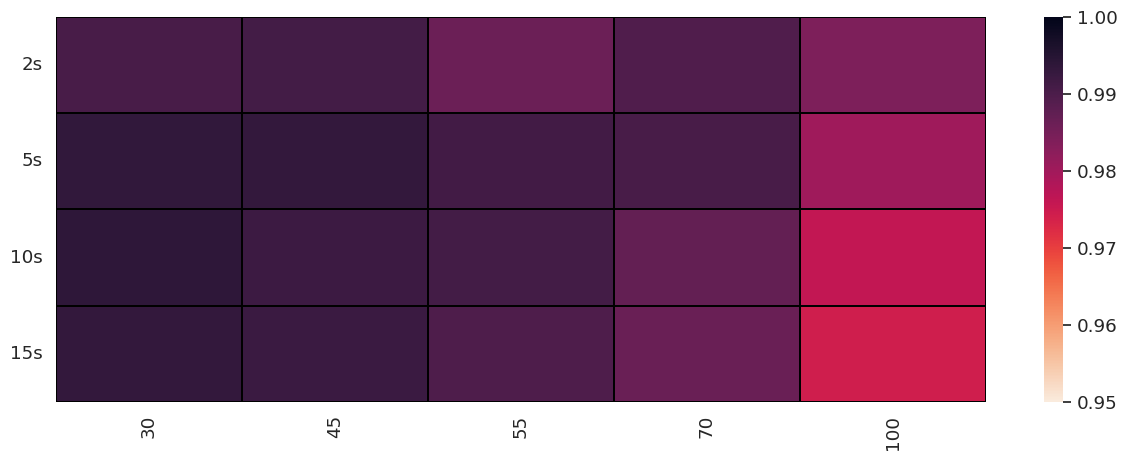

In [47]:
# Now the arrays are ready for plotting 
data_s = pd.DataFrame(Knee_av_final,columns=['30','45','55','70','100'], index=['2s','5s','10s','15s'])
fig, ax = imagesc.seaborn(data_s.values, data_s.index.values, data_s.columns.values,
                          cmap='rocket_r', vmin=0.95, vmax=1.0)

#plt.savefig("Group_Sens_Knee.svg", dpi = 600 )

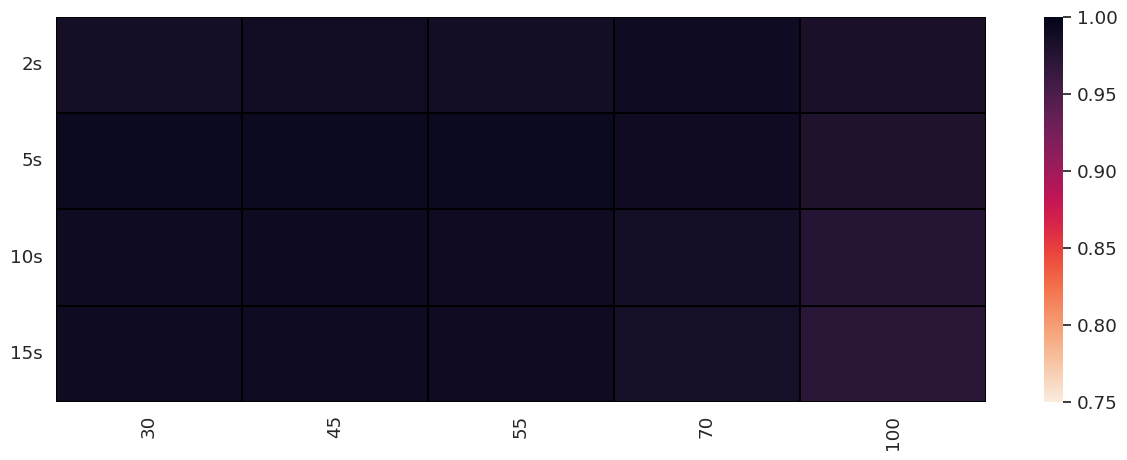

In [48]:
# Now the arrays are ready for plotting 
data_s = pd.DataFrame(NKnee_av_final,columns=['30','45','55','70','100'], index=['2s','5s','10s','15s'])
fig, ax = imagesc.seaborn(data_s.values, data_s.index.values, data_s.columns.values,
                          cmap='rocket_r', vmin=0.75, vmax=1.0)

#plt.savefig("Group_Sens_NoKnee.svg", dpi = 600 )

Now do the same, but for the sleep stages separately



In [36]:
# REM SLEEP
nfm      = FOOOF()
nfm2     = FOOOF()

i = 0
S_arr = pd.DataFrame(np.nan,index=range(len(sbj_folders)),columns=range(len(filesF)))
NS_arr = pd.DataFrame(np.nan,index=range(len(sbj_folders)),columns=range(len(filesF)))

for subj in sbj_folders:
    path1 = subj / 'RM' / 'Knee'
    filesF = list(path1.iterdir())
    path2 = subj / 'RM' / 'NoKnee'
    filesF2 = list(path2.iterdir())
        
    ii=0
    for F in filesF:
        nfm.load(os.path.basename(F) , str(path1))
        S_arr.iloc[[i],[ii]] = nfm.r_squared_
        ii = ii+1
            
    ii=0    
    for F2 in filesF2:
        nfm2.load(os.path.basename(F2) , str(path2))
        NS_arr.iloc[[i],[ii]] = nfm2.r_squared_
        ii = ii+1
    
    i = i+1
    
K_R2_all = list(S_arr.mean(axis=0))
NK_R2_all = list(NS_arr.mean(axis=0))

Knee_av_final = np.reshape(K_R2_all, (5, 4)).T
NKnee_av_final = np.reshape(NK_R2_all, (5, 4)).T
                                      

In [37]:
subj

PosixPath('/home/b1044271/Columbia/Results/FOOOF_interp/Cz/VP19')

In [38]:
X = [np.mean(Knee_av_final), np.mean(NKnee_av_final)]
X

[0.995768642890998, 0.9938116166162209]

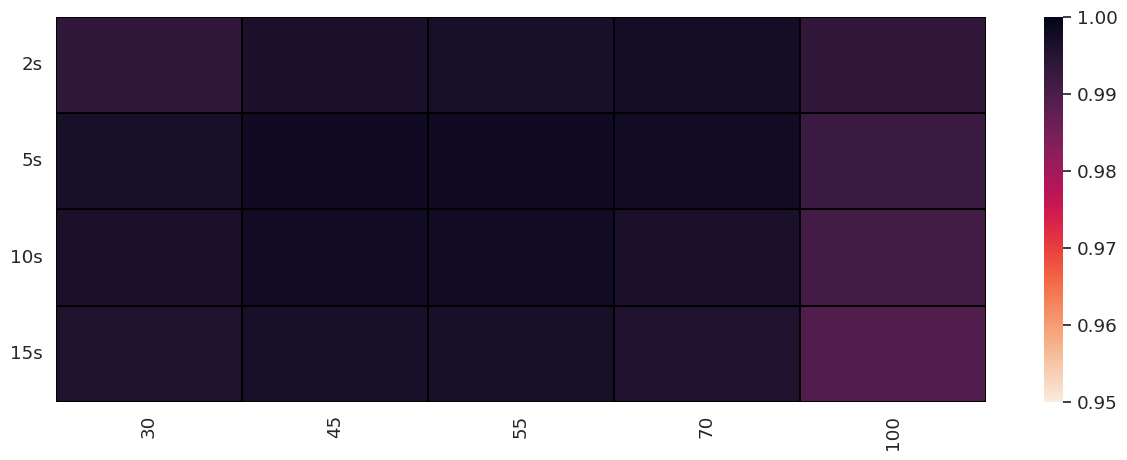

<Figure size 640x480 with 0 Axes>

In [39]:
# Now the arrays are ready for plotting 
data_s = pd.DataFrame(Knee_av_final,columns=['30','45','55','70','100'], index=['2s','5s','10s','15s'])
fig, ax = imagesc.seaborn(data_s.values, data_s.index.values, data_s.columns.values,
                          cmap='rocket_r', vmin=0.95, vmax=1.0)

plt.savefig("Group_REM_Knee.svg", dpi = 600 )

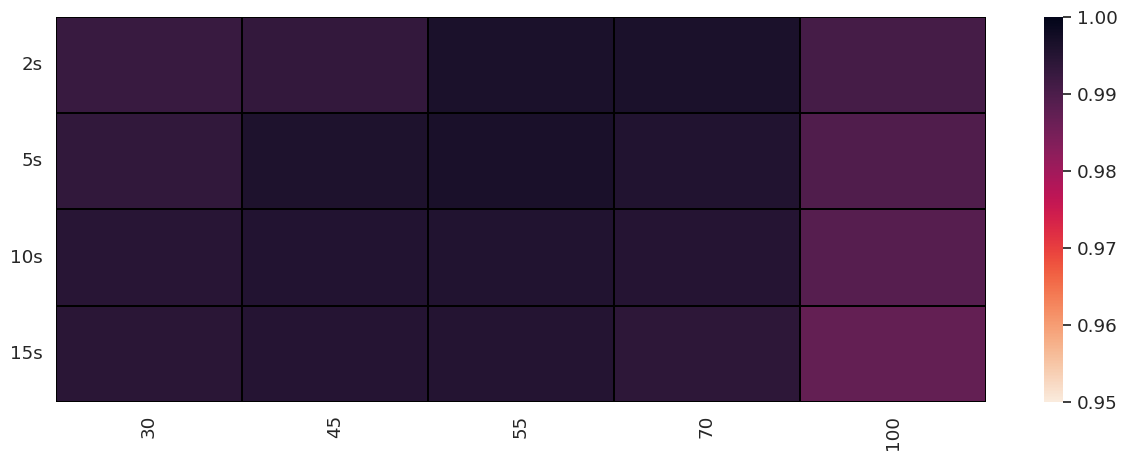

<Figure size 640x480 with 0 Axes>

In [41]:
# Now the arrays are ready for plotting 
data_s = pd.DataFrame(NKnee_av_final,columns=['30','45','55','70','100'], index=['2s','5s','10s','15s'])
fig, ax = imagesc.seaborn(data_s.values, data_s.index.values, data_s.columns.values,
                          cmap='rocket_r', vmin=0.95, vmax=1.0)

plt.savefig("Group_REM_NoKnee.jpg", dpi = 600 )

In [ ]:
# REM SLEEP
nfm      = FOOOF()
nfm2     = FOOOF()

i = 0
S_arr = pd.DataFrame(np.nan,index=range(len(sbj_folders)),columns=range(len(filesF)))
NS_arr = pd.DataFrame(np.nan,index=range(len(sbj_folders)),columns=range(len(filesF)))

for subj in sbj_folders:
    path1 = subj / 'RM' / 'Knee'
    filesF = list(path1.iterdir())
    path2 = subj / 'RM' / 'NoKnee'
    filesF2 = list(path2.iterdir())
    
    nfm.load('_RM_T5_F45_Knee' , str(path1))
        

In [35]:
os.basename(filesF)

AttributeError: module 'os' has no attribute 'basename'

In [242]:
# AWAKE
nfm      = FOOOF()
nfm2     = FOOOF()

i = 0
S_arr = pd.DataFrame(np.nan,index=range(len(sbj_folders)),columns=range(len(filesF)))
NS_arr = pd.DataFrame(np.nan,index=range(len(sbj_folders)),columns=range(len(filesF)))

for subj in sbj_folders:
    path1 = subj / 'AW' / 'Knee'
    filesF = list(path1.iterdir())
    path2 = subj / 'AW' / 'NoKnee'
    filesF2 = list(path2.iterdir())
        
    ii=0
    for F in filesF:
        nfm.load(os.path.basename(F) , str(path1))
        S_arr.iloc[[i],[ii]] = nfm.r_squared_
        ii = ii+1
            
    ii=0    
    for F2 in filesF2:
        nfm2.load(os.path.basename(F2) , str(path2))
        NS_arr.iloc[[i],[ii]] = nfm2.r_squared_
        ii = ii+1
    
    i = i+1
    
K_R2_all = list(S_arr.mean(axis=0))
NK_R2_all = list(NS_arr.mean(axis=0))

Knee_av_final = np.reshape(K_R2_all, (5, 4)).T
NKnee_av_final = np.reshape(NK_R2_all, (5, 4)).T
                                      

In [243]:
X = [np.mean(Knee_av_final), np.mean(NKnee_av_final)]
X

[0.9694960825117022, 0.9707090936562566]

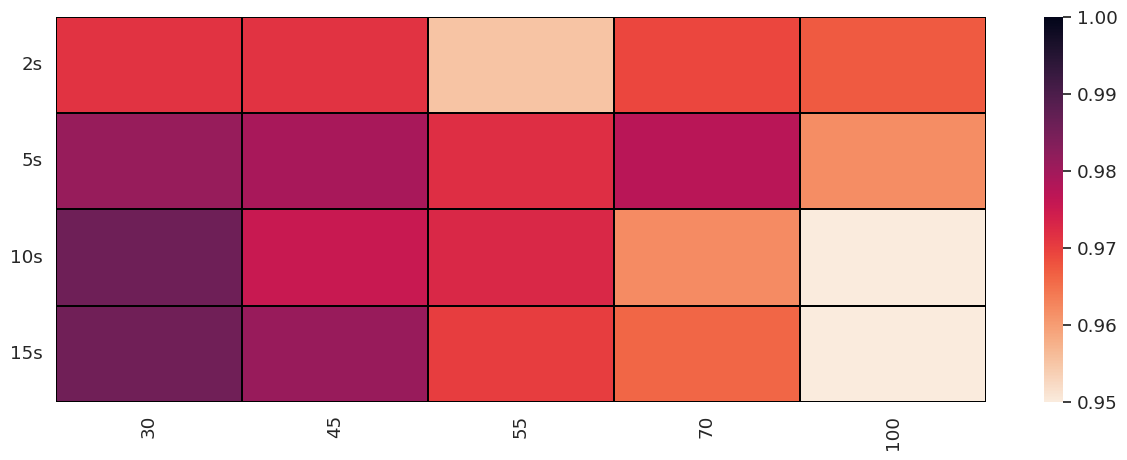

In [224]:
# Now the arrays are ready for plotting 
data_s = pd.DataFrame(Knee_av_final,columns=['30','45','55','70','100'], index=['2s','5s','10s','15s'])
fig, ax = imagesc.seaborn(data_s.values, data_s.index.values, data_s.columns.values,
                          cmap='rocket_r', vmin=0.95, vmax=1.0)

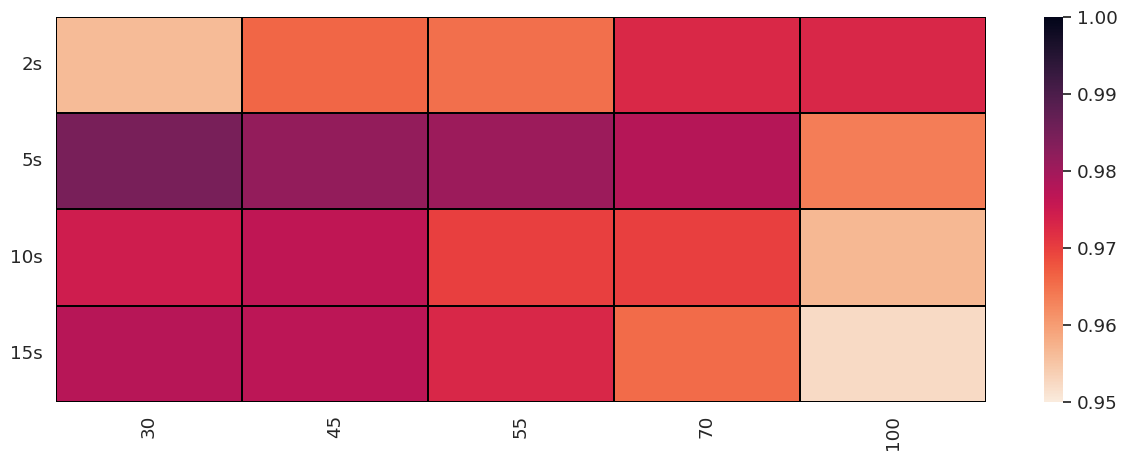

In [225]:
# Now the arrays are ready for plotting 
data_s = pd.DataFrame(NKnee_av_final,columns=['30','45','55','70','100'], index=['2s','5s','10s','15s'])
fig, ax = imagesc.seaborn(data_s.values, data_s.index.values, data_s.columns.values,
                          cmap='rocket_r', vmin=0.95, vmax=1.0)

In [240]:
# N1
nfm      = FOOOF()
nfm2     = FOOOF()

i = 0
S_arr = pd.DataFrame(np.nan,index=range(len(sbj_folders)),columns=range(len(filesF)))
NS_arr = pd.DataFrame(np.nan,index=range(len(sbj_folders)),columns=range(len(filesF)))

for subj in sbj_folders:
    path1 = subj / 'N1' / 'Knee'
    filesF = list(path1.iterdir())
    path2 = subj / 'N1' / 'NoKnee'
    filesF2 = list(path2.iterdir())
        
    ii=0
    for F in filesF:
        nfm.load(os.path.basename(F) , str(path1))
        S_arr.iloc[[i],[ii]] = nfm.r_squared_
        ii = ii+1
            
    ii=0    
    for F2 in filesF2:
        nfm2.load(os.path.basename(F2) , str(path2))
        NS_arr.iloc[[i],[ii]] = nfm2.r_squared_
        ii = ii+1
    
    i = i+1
    
K_R2_all = list(S_arr.mean(axis=0))
NK_R2_all = list(NS_arr.mean(axis=0))

Knee_av_final = np.reshape(K_R2_all, (5, 4)).T
NKnee_av_final = np.reshape(NK_R2_all, (5, 4)).T
               

In [241]:
X = [np.mean(Knee_av_final), np.mean(NKnee_av_final)]
X

[0.9849836524360231, 0.982432984362708]

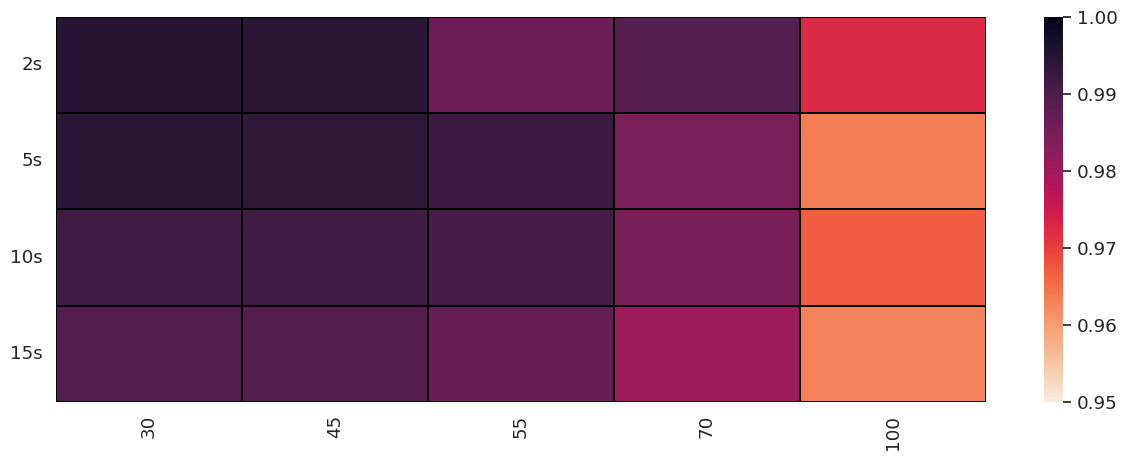

In [227]:
# Now the arrays are ready for plotting 
data_s = pd.DataFrame(Knee_av_final,columns=['30','45','55','70','100'], index=['2s','5s','10s','15s'])
fig, ax = imagesc.seaborn(data_s.values, data_s.index.values, data_s.columns.values,
                          cmap='rocket_r', vmin=0.95, vmax=1.0)

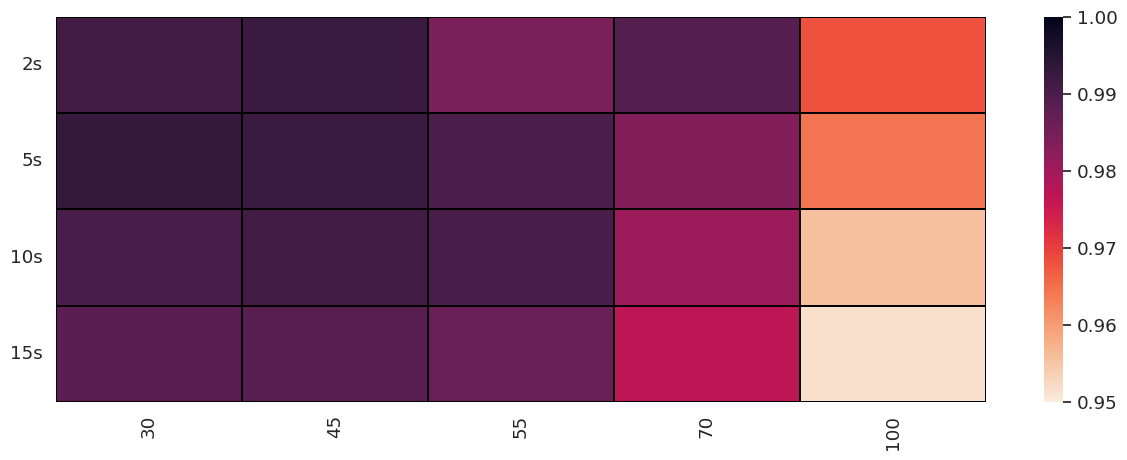

In [228]:
# Now the arrays are ready for plotting 
data_s = pd.DataFrame(NKnee_av_final,columns=['30','45','55','70','100'], index=['2s','5s','10s','15s'])
fig, ax = imagesc.seaborn(data_s.values, data_s.index.values, data_s.columns.values,
                          cmap='rocket_r', vmin=0.95, vmax=1.0)

In [238]:
# N2
nfm      = FOOOF()
nfm2     = FOOOF()

i = 0
S_arr = pd.DataFrame(np.nan,index=range(len(sbj_folders)),columns=range(len(filesF)))
NS_arr = pd.DataFrame(np.nan,index=range(len(sbj_folders)),columns=range(len(filesF)))

for subj in sbj_folders:
    path1 = subj / 'N2' / 'Knee'
    filesF = list(path1.iterdir())
    path2 = subj / 'N2' / 'NoKnee'
    filesF2 = list(path2.iterdir())
        
    ii=0
    for F in filesF:
        nfm.load(os.path.basename(F) , str(path1))
        S_arr.iloc[[i],[ii]] = nfm.r_squared_
        ii = ii+1
            
    ii=0    
    for F2 in filesF2:
        nfm2.load(os.path.basename(F2) , str(path2))
        NS_arr.iloc[[i],[ii]] = nfm2.r_squared_
        ii = ii+1
    
    i = i+1
    
K_R2_all = list(S_arr.mean(axis=0))
NK_R2_all = list(NS_arr.mean(axis=0))

Knee_av_final = np.reshape(K_R2_all, (5, 4)).T
NKnee_av_final = np.reshape(NK_R2_all, (5, 4)).T
               

In [239]:
X = [np.mean(Knee_av_final), np.mean(NKnee_av_final)]
X

[0.9963378969847485, 0.9948307253003135]

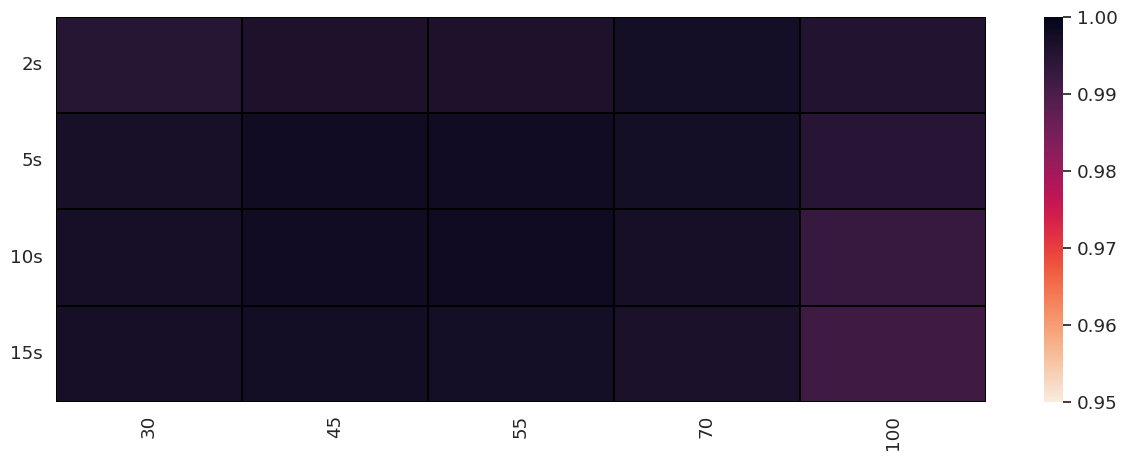

In [230]:
# Now the arrays are ready for plotting 
data_s = pd.DataFrame(Knee_av_final,columns=['30','45','55','70','100'], index=['2s','5s','10s','15s'])
fig, ax = imagesc.seaborn(data_s.values, data_s.index.values, data_s.columns.values,
                          cmap='rocket_r', vmin=0.95, vmax=1.0)

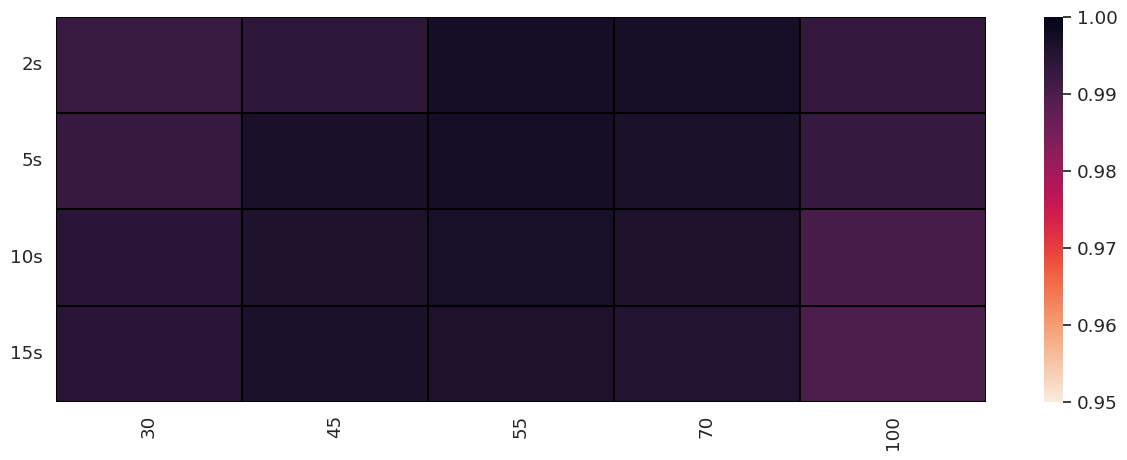

In [231]:
# Now the arrays are ready for plotting 
data_s = pd.DataFrame(NKnee_av_final,columns=['30','45','55','70','100'], index=['2s','5s','10s','15s'])
fig, ax = imagesc.seaborn(data_s.values, data_s.index.values, data_s.columns.values,
                          cmap='rocket_r', vmin=0.95, vmax=1.0)

In [237]:
# N3
nfm      = FOOOF()
nfm2     = FOOOF()

i = 0
S_arr = pd.DataFrame(np.nan,index=range(len(sbj_folders)),columns=range(len(filesF)))
NS_arr = pd.DataFrame(np.nan,index=range(len(sbj_folders)),columns=range(len(filesF)))

for subj in sbj_folders:
    path1 = subj / 'N3' / 'Knee'
    filesF = list(path1.iterdir())
    path2 = subj / 'N3' / 'NoKnee'
    filesF2 = list(path2.iterdir())
        
    ii=0
    for F in filesF:
        nfm.load(os.path.basename(F) , str(path1))
        S_arr.iloc[[i],[ii]] = nfm.r_squared_
        ii = ii+1
            
    ii=0    
    for F2 in filesF2:
        nfm2.load(os.path.basename(F2) , str(path2))
        NS_arr.iloc[[i],[ii]] = nfm2.r_squared_
        ii = ii+1
    
    i = i+1
    
K_R2_all = list(S_arr.mean(axis=0))
NK_R2_all = list(NS_arr.mean(axis=0))

Knee_av_final = np.reshape(K_R2_all, (5, 4)).T
NKnee_av_final = np.reshape(NK_R2_all, (5, 4)).T
               

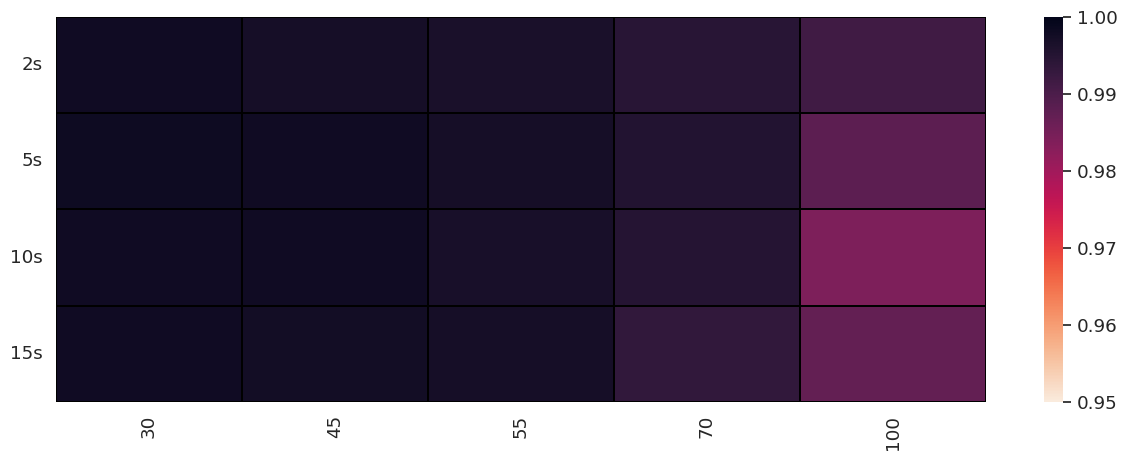

In [233]:
# Now the arrays are ready for plotting 
data_s = pd.DataFrame(Knee_av_final,columns=['30','45','55','70','100'], index=['2s','5s','10s','15s'])
fig, ax = imagesc.seaborn(data_s.values, data_s.index.values, data_s.columns.values,
                          cmap='rocket_r', vmin=0.95, vmax=1.0)

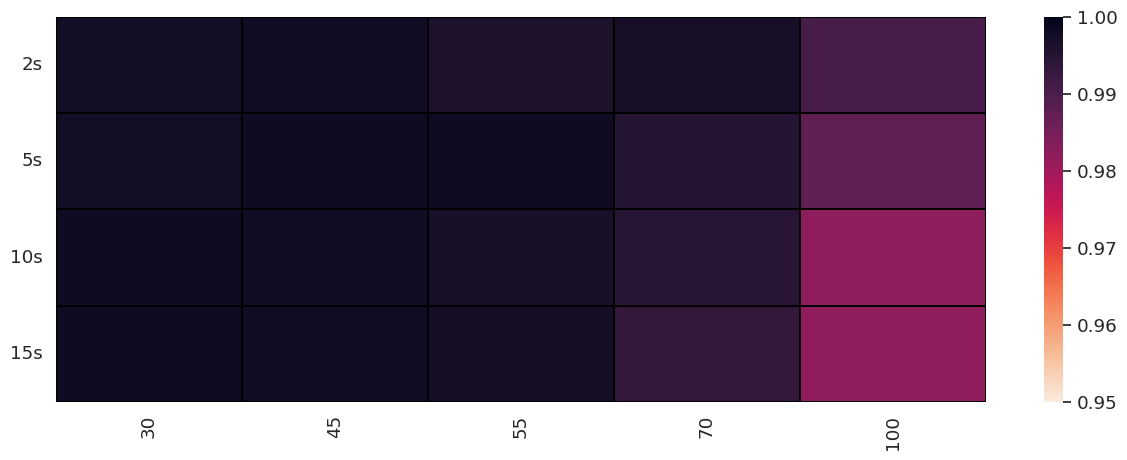

In [234]:
# Now the arrays are ready for plotting 
data_s = pd.DataFrame(NKnee_av_final,columns=['30','45','55','70','100'], index=['2s','5s','10s','15s'])
fig, ax = imagesc.seaborn(data_s.values, data_s.index.values, data_s.columns.values,
                          cmap='rocket_r', vmin=0.95, vmax=1.0)

In [236]:
X = [np.mean(Knee_av_final), np.mean(NKnee_av_final)]
X

[0.9949913071057208, 0.9946172131948625]